<a href="https://colab.research.google.com/github/fdmatoz/UWIntroductiontoNeuralNetworks/blob/main/Exercises_Class_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 5: Workbook

_____

Author: Daniel Matoz

Student: Wojciech Noskowiak

## Perceptron

1. Build a generic binary classification perceptron neural network that takes a vector of features **X**, the labels *y* and the number of epochs *nb_epochs_max*. Your perceptron has to return the history error (i.e the number of misclassification per epoch) , and the decision boundary. Hint: You can use a ```python class``` to make your code more generic and clean.

2. Using Pandas read the Iris dataset (url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
) extract ```Iris-versicolor``` and ```Iris-setosa```. Hint: filter the dataset for each class and then create a new dataset by concatenate them in the same way that we did in class. Use thw following to check if your data es correct:
```
print(df[df['y'] == 1].count())
print(df[df['y'] == -1].count())
```
you should see 50 of each

3. Using the two classes create a new column with non-categorical labels, i.e, with a numeric variable ```1: Iris-versicolor``` and ```-1: Iris-setosa``` that is your label input ```y```.

4. Build a generic function that separates the dataset into trainning and testing examples for each vector of features **X**, and the labels *y*. Your function has to be flexible enough to accept the trainning size and a seed number such as the trainning and test selection are reproducible. Hint: you can use Numpy random functions but be aware that a given example *i* cannot repeat in the trainning set nor in the test set. Also, if you use DataFrames you can use the mask and the .iloc options. For example, 
```
df.iloc[[0,10]]
```
returns a DataFrame with the row 0 and 10. Also you can use the Pandas sample function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html). Once that you have selected your train sample then you can filter the test by doing:
```
test = df.drop(index=train.index)
```
which will deleter all of the indices that belongs to train

5. Train your perceptron to distinguish ```Iris-versicolor``` from ```Iris-setosa``` by using the first feature column (sepal length) and the third feature column (petal length). Use 80% of the dataset size for trainning and 20% for testing.

#### Note: the plots are considered correct only if their axes and title are appropriately labeled.

6. Plot the error vs epochs. What do you observe?

7. Plot the decesion boundary for the trainning

8. Test your data against the test dataset. How good does it do?

9. Feature building. Now that you have the neural netowork working you can create new features by combining defined features together. Combine ```sepal length```,  ```sepal width```, ```petal length``` and  ```petal width``` to produce two new features. Train your perceptron again with the new feature and plot the results.

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [280]:
# 1

class classification_network():

    def __init__(self, xx, y, eta, nb_epochs_max):
        self.epochs = nb_epochs_max
        self.vec_of_vals = np.array([np.insert(x,0,1) for x in xx], dtype=float)
        self.vec_of_features = np.array(y, dtype=float)
        self.wh = np.zeros(len(self.vec_of_vals[0]), dtype=float)
        self.eta = eta
        self.error_hist = [0]*self.epochs
        self.learning_subset_indexes = np.random.choice(list(range(len(self.vec_of_vals))), size=int(1*len(self.vec_of_vals)))
        self.vali_subset_indexes = np.array(list(set(range(len(self.vec_of_vals))).difference(set(self.learning_subset_indexes))))
        print(self.vali_subset_indexes)

    def perceptron(self, i):
        return 1 if np.dot(self.vec_of_vals[i], self.wh)>0 else 0

    def get_error(self):
        y_cal = np.array([self.perceptron(i) for i in self.vali_subset_indexes])
        y = np.array([self.vec_of_features[i] for i in self.vali_subset_indexes])
        temp = y_cal - y
        return np.dot(temp,temp)

    def evol(self,i):
            y_hat = self.perceptron(i)
            y = self.vec_of_features[i]
            return np.array([self.eta*(y-y_hat)*xi for xi in self.vec_of_vals[i]]) 


    def run(self):
        
        for j in range(self.epochs):
            for i in self.learning_subset_indexes:
                delta_wh = self.evol(i)
                self.wh += delta_wh
            self.error_hist[j] = self.get_error()
        return self.wh, self.error_hist
          



In [281]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

header_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

df = pd.read_csv(url, names = header_names)

# Iris-versicolor
# Iris-setosa

iv = df[df["class"] == "Iris-versicolor"]
# iv["class"] = -1

iss = df[df["class"] == "Iris-setosa"]
# iss = iss["class"] = 1

df_joint = pd.concat([iss, iv])

df_joint["classification"] = np.where(df_joint["class"] == "Iris-setosa", -1, 1) 
print(df_joint)


    sepal length  sepal width  petal length  petal width            class  \
0            5.1          3.5           1.4          0.2      Iris-setosa   
1            4.9          3.0           1.4          0.2      Iris-setosa   
2            4.7          3.2           1.3          0.2      Iris-setosa   
3            4.6          3.1           1.5          0.2      Iris-setosa   
4            5.0          3.6           1.4          0.2      Iris-setosa   
..           ...          ...           ...          ...              ...   
95           5.7          3.0           4.2          1.2  Iris-versicolor   
96           5.7          2.9           4.2          1.3  Iris-versicolor   
97           6.2          2.9           4.3          1.3  Iris-versicolor   
98           5.1          2.5           3.0          1.1  Iris-versicolor   
99           5.7          2.8           4.1          1.3  Iris-versicolor   

    classification  
0               -1  
1               -1  
2           

In [282]:
# print(df_joint[["sepal length","sepal width","petal length", "petal width","classification"]])
vals = df_joint["classification"].to_numpy()
vecs = df_joint[["sepal length","petal length"]].to_numpy()
vecs

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [283]:
sym = classification_network(vecs, vals, 0.2, 13)
ws, ys = sym.run()
ys

[ 0  1  2  5  8 10 13 14 16 22 24 25 38 40 41 42 52 53 54 57 61 62 65 67
 71 74 75 78 79 81 83 85 86 88 89 90 94 95 97 99]


[17.0, 24.0, 29.0, 25.0, 28.0, 35.0, 35.0, 36.0, 38.0, 38.0, 38.0, 38.0, 38.0]

[ -46.6  -147.88  203.88]


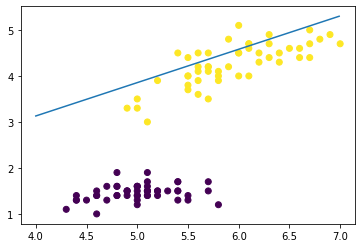

In [284]:
import matplotlib.pyplot as plt


plt.scatter(vecs[:,0], vecs[:,1], c =vals)


def line(x):
    return (-ws[0]-x*ws[1])/ws[2]

x = np.arange(4,7,0.01)
z = line(x)


print(ws)

plt.plot(x,z)
plt.show()

## ADAptive LInear NEuron (Adaline) 

1. Build a generic binary classification Implement the ADAptive LInear NEuron (Adaline) neural network that takes a vector of features X, the labels y and the number of epochs nb_epochs_max. Your perceptron has to return the history error (i.e the Sum of Squared Errors (SSE) per epoch) , and the decision boundary. Hint: You can use a python class to make your code more generic and clean.

2. Train your Adaline ANN to distinguish ```Iris-versicolor``` from ```Iris-setosa``` by using the first feature column (sepal length) and the third feature column (petal length). Use 80% of the dataset size for trainning and 20% for testing.

#### Note: the plots are considered correct only if their axes and title are appropriately labeled.

3. For different values of the learning rate $\eta$, plot the error vs epochs. What do you observe?

4. Test your data against the test dataset. How good does it do with respect to the perceptron?

5. Implement Batch learning and compare with the online learning from 1.


In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [296]:
# 1

class adaptive_linear():

    def __init__(self, xx, y, eta, nb_epochs_max):
        self.epochs = nb_epochs_max
        self.vec_of_vals = np.array([np.insert(x,0,1) for x in xx], dtype=float)
        self.vec_of_features = np.array(y, dtype=float)
        self.wh = np.zeros(len(self.vec_of_vals[0]), dtype=float)
        self.eta = eta
        self.error_hist = [0]*self.epochs
        self.learning_subset_indexes = np.random.choice(list(range(len(self.vec_of_vals))), size=int(1*len(self.vec_of_vals)))
        self.vali_subset_indexes = np.array(list(set(range(len(self.vec_of_vals))).difference(set(self.learning_subset_indexes))))
        # print(self.vali_subset_indexes)

    def psi(self, i):
        return np.dot(self.vec_of_vals[i], self.wh)

    def perceptron(self, i):
        return 1 if np.dot(self.vec_of_vals[i], self.wh)>0 else 0

    def get_error(self):
        y_cal = np.array([(2*int(self.psi(i)>0) - 1) for i in self.vali_subset_indexes])
        # print(self.psi_vec())
        y = np.array([self.vec_of_features[i] for i in self.vali_subset_indexes])
        temp = y_cal - y
        return np.dot(temp,temp)

    def psi_vec(self):
        return np.array([self.psi(i) for i in self.learning_subset_indexes])
    
    def j_vec(self):
        psi_vec = self.psi_vec()
        temp = self.vec_of_features[self.learning_subset_indexes] - psi_vec
        xes = np.array([[self.vec_of_vals[j][i] for j in self.learning_subset_indexes] for i in range(len(self.vec_of_vals[0]))])
        return np.array([-np.dot(temp, x) for x in xes])


    def run(self):
        
        for j in range(self.epochs):
            self.wh -= self.eta*self.j_vec()
            self.error_hist[j] = self.get_error()
        return self.wh, self.error_hist
          



[-0.05305169 -0.13931526  0.30360815] 0.0


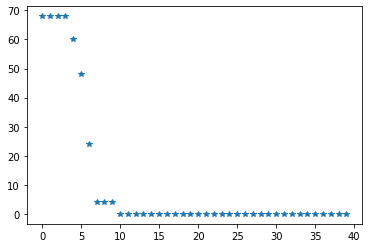

In [303]:
sym = adaptive_linear(vecs, vals, 0.0001, 40)
ws, ys = sym.run()
print(ws, ys[-1])

plt.plot(ys, '*')
plt.show()

## Extra

1. Consider the following activation function:

$$
\phi(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}
$$
with 

$$
z^{(i)} = x_0\,b^{(i)} + \sum_{j=1}^{n_{features}}w_j^{(i)}x_j^{(i)}
$$

Ignoring the bias (i.e $b^{(i)} = 0 ∀ \,i$), create a Logistic ADAptive LInear NEuron. 

2. Using the Iris dataset from before, compare the LAdaline vs. Adaline. How the erros over training epoch compare?